In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [216]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans

In [217]:
number_data = pd.read_csv('mnist_train.csv')

number_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
number_data.shape

(60000, 785)

In [219]:
sorted(number_data['label'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [220]:
number_features = number_data.drop('label', axis=1)

number_features.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [221]:
number_labels = number_data['label']

number_labels.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [222]:
def display_image(index):
    print("Digit: ", number_labels[index])
        
    plt.imshow(number_features.loc[index].values.reshape(28,28), cmap='Greys')

Digit:  2


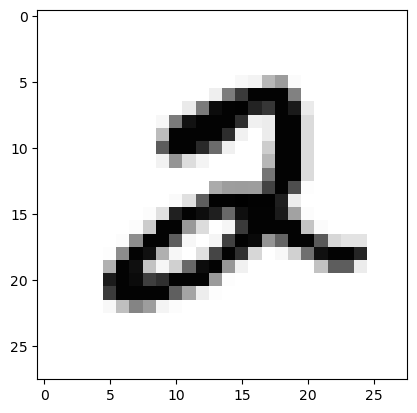

In [223]:
display_image(5)

Digit:  3


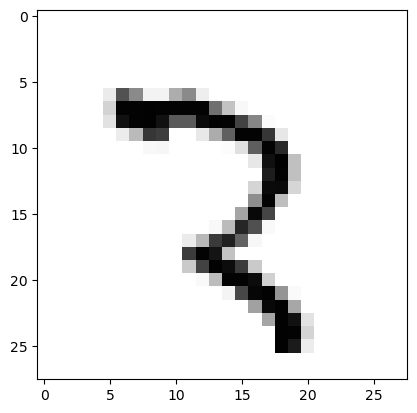

In [224]:
display_image(500)

In [225]:
kmeans_model = KMeans(n_clusters=10, max_iter=1000).fit(number_features)

In [226]:
kmeans_centroids = kmeans_model.cluster_centers_

kmeans_centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [227]:
kmeans_centroids.shape

(10, 784)

/var/folders/rd/zz5zhdcs41z_jyc6z4nvg_5r0000gn/T/ipykernel_20103/59258134.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, centroid + 1)


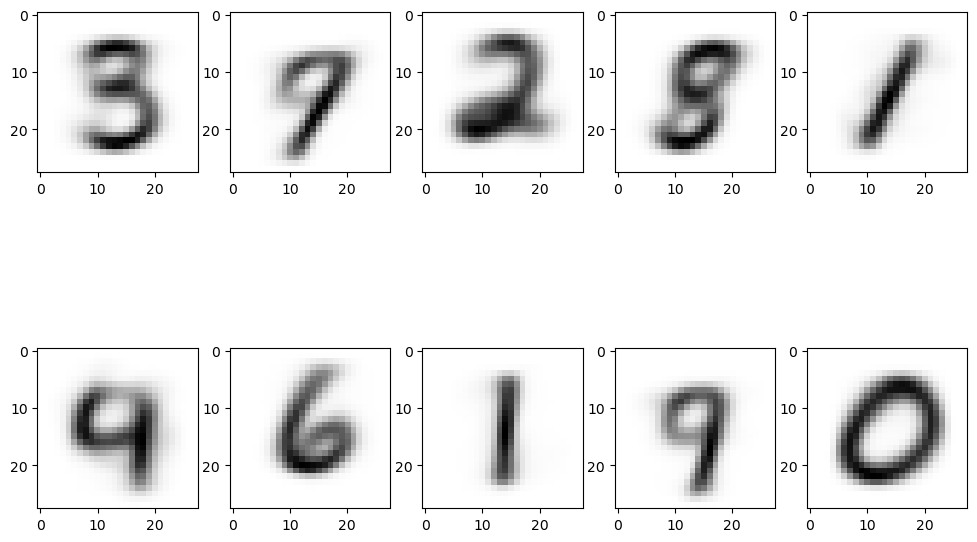

In [228]:
fig, ax = plt.subplots(figsize=(12, 8))

for centroid in range(len(kmeans_centroids)):
    plt.subplot(2, 5, centroid + 1)

    plt.imshow(kmeans_centroids[centroid].reshape(28, 28), cmap='Greys')

In [229]:
np.unique(kmeans_model.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [230]:
number_test = number_data.sample(10, replace=False)

number_test_features = number_test.drop('label', axis=1)

number_test_labels = number_test['label']

In [231]:
number_test_labels

44611    2
4310     0
59978    3
25936    5
20225    0
36644    3
19161    4
5639     4
32241    6
12115    0
Name: label, dtype: int64

In [232]:
number_test_labels = np.array(number_test_labels)

number_test_labels

array([2, 0, 3, 5, 0, 3, 4, 4, 6, 0])

In [233]:
pred_clusters = kmeans_model.predict(number_test_features)

In [234]:
pred_results = pd.DataFrame({'actual_digit': number_test_labels,
                             'pred_cluster': pred_clusters})

pred_results.head(10)

,actual_digit,pred_cluster
0,2,2
1,0,9
2,3,0
3,5,0
4,0,9
5,3,0
6,4,5
7,4,1
8,6,6
9,0,9


### Mini batch

In [240]:
import sys
import sklearn
import matplotlib
import numpy as np

print('Python: {}'.format(sys.version))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('NumPy: {}'.format(np.__version__))

Python: 3.11.5 (main, Sep 11 2023, 08:31:25) [Clang 14.0.6 ]
Sklearn: 1.4.1.post1
Matplotlib: 3.7.2
NumPy: 1.24.3


In [241]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

Training Data: (60000, 28, 28)
Training Labels: (60000,)


In [242]:
print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))

Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


In [243]:
import matplotlib.pyplot as plt

%matplotlib inline

/var/folders/rd/zz5zhdcs41z_jyc6z4nvg_5r0000gn/T/ipykernel_20103/140264990.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


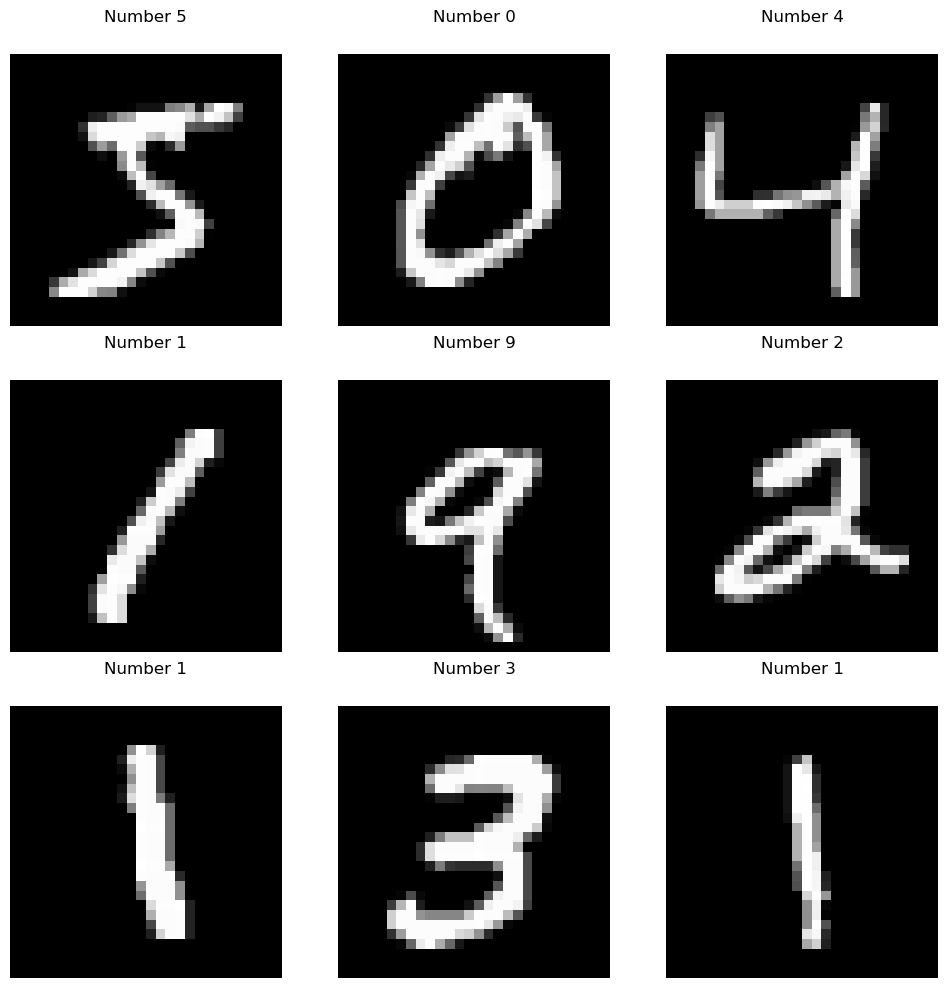

In [244]:
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
fig.show()

In [245]:
X = x_train.reshape(len(x_train),-1)
Y = y_train

X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


In [246]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)

kmeans = MiniBatchKMeans(n_clusters = n_digits)

kmeans.fit(X)

10


MiniBatchKMeans(n_clusters=10)

In [247]:
kmeans.labels_

array([8, 2, 4, ..., 7, 0, 5], dtype=int32)

In [248]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        labels = []
        index = np.where(kmeans.labels_ == i)

        labels.append(actual_labels[index])

        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [249]:
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print (predicted_labels[:20])
print (Y[:20])

[3 0 4 8 9 2 1 3 1 9 3 8 3 6 1 7 2 8 6 9]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [250]:
from sklearn import metrics

def calculate_metrics(estimator, data, labels):

    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [251]:
clusters = [10, 16, 36, 64, 144, 256]

for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    calculate_metrics(estimator, X, Y)
    
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

Number of Clusters: 10
Inertia: 2383680.598736603
Homogeneity: 0.4844485482720049
Accuracy: 0.5994833333333334

Number of Clusters: 16
Inertia: 2220182.882593181
Homogeneity: 0.5659388005417653
Accuracy: 0.6592166666666667

Number of Clusters: 36
Inertia: 1969075.5206149183
Homogeneity: 0.6603401732789542
Accuracy: 0.7213833333333334

Number of Clusters: 64
Inertia: 1805328.2234333542
Homogeneity: 0.7482300755933398
Accuracy: 0.8264166666666667

Number of Clusters: 144
Inertia: 1619594.5425645295
Homogeneity: 0.8098208600001758
Accuracy: 0.8710666666666667

Number of Clusters: 256
Inertia: 1503630.5357129518
Homogeneity: 0.8436445498362973
Accuracy: 0.8990333333333334



In [252]:
X_test = x_test.reshape(len(x_test),-1)

X_test = X_test.astype(float) / 255.

kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)

test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)
    
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

Accuracy: 0.8983



/var/folders/rd/zz5zhdcs41z_jyc6z4nvg_5r0000gn/T/ipykernel_20103/983761537.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


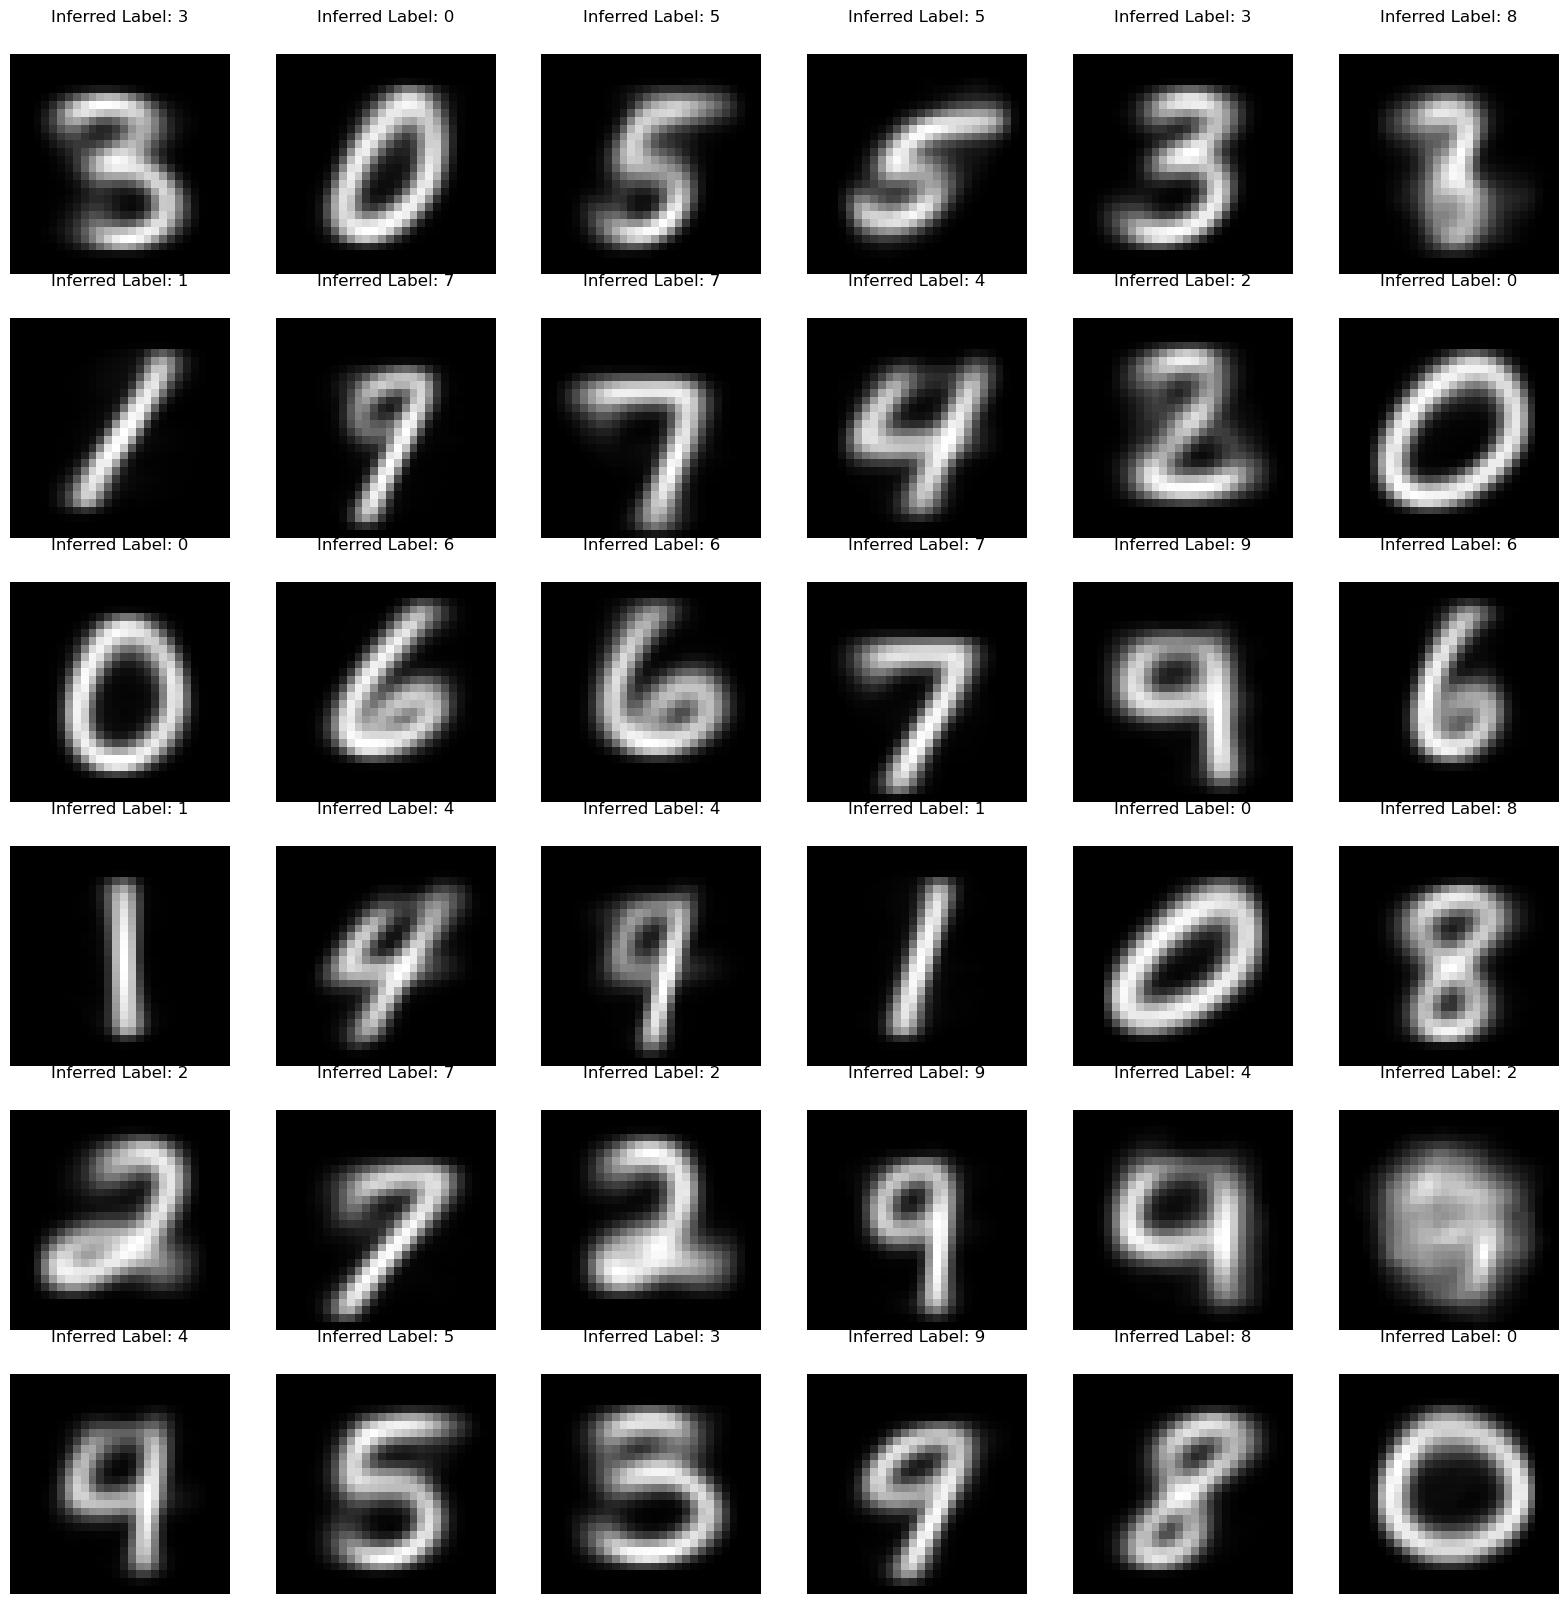

In [253]:
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)

centroids = kmeans.cluster_centers_

images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)

cluster_labels = infer_cluster_labels(kmeans, Y)

fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()

for i, ax in enumerate(axs.flat):
    
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    
    ax.matshow(images[i])
    ax.axis('off')
    
fig.show()